In [11]:
import os
import subprocess
import sys
import shutil
import time
import re
import argparse
import matplotlib.pyplot as plt
import math
import random
import numpy as np
from statistics import mean
import pickle
from matplotlib import rcParams

rcParams["font.size"] = 20
rcParams["axes.titlesize"] = 24
rcParams["axes.labelsize"] = 20
rcParams["xtick.labelsize"] = 18
rcParams["ytick.labelsize"] = 18
rcParams["legend.fontsize"] = 18
# rcParams["font.family"] = "serif"
# rcParams["font.serif"] = ["Linux Libertine"]

In [12]:
#define globals
prefix="rosa-ex15-"
tmp_dir="tmp"
plots_dir="plots"
log_dir="log"
ablate_type=12

In [13]:
# load pkl files
def load_ablation_data(tmp_dir,prefix):
    ablt = 0
    pkl_data = []
    for i in range(1,5):
        ablt = ablt*10 + i
        data_file = os.path.join(tmp_dir,f"{ablt}-{prefix}benchmark_data.pkl")
        with open(data_file, "rb") as f:
            data = pickle.load(f)
    
        # data has  what we need!
        pkl_data.append((ablt,data))
    return pkl_data

# Runtime vs computational cost budget
def plot_runtime_ablation(pkl_data,legend_labels,output_format="png"):
    budgets = pkl_data[0][1]["budgets"] # doesnt change
    xpos = np.arange(len(budgets))
    fig1, ax1 = plt.subplots(figsize=(10, 8))
    # Set width of bars and positions of the bars
    bar_width = 0.2
    
    rects = []
    # plot bar graphs
    ablt = 0
    for i in range(1,5):
        ablt = ablt*10 + i
        rect = ax1.bar(xpos - 1.5*bar_width + i*bar_width,pkl_data[i-1][1]["runtimes"],bar_width,label=legend_labels[i-1])
        rects.append(rect)
    
    # Customize the plot
    ax1.set_xlabel('Computational Cost Budget')
    ax1.set_ylabel('Runtimes (seconds)')
    ax1.set_title('Runtime Ablation Study')
    ax1.set_xticks(xpos)
    ax1.set_xticklabels([f'{b:,}' for b in budgets], rotation=45, ha='right')
    
    # Add legend
    ax1.legend()
    
    
    # Add grid for better readability
    ax1.grid(True, linestyle='--', alpha=0.7, axis='y')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    plot_filename1 = os.path.join(plots_dir, f"runtime_ablation_plot_{prefix[:-1]}.{output_format}")
    plt.savefig(plot_filename1, bbox_inches="tight", dpi=300)

# Runtime vs computational cost budget
def plot_error_ablation(pkl_data,legend_labels,output_format="png"):
    budgets = pkl_data[0][1]["budgets"] # doesnt change
    xpos = np.arange(len(budgets))
    fig1, ax1 = plt.subplots(figsize=(10, 8))
    # Set width of bars and positions of the bars
    bar_width = 0.2
    
    rects = []
    # plot bar graphs
    ablt = 0
    for i in range(1,5):
        ablt = ablt*10 + i
        rect = ax1.bar(xpos - 1.5*bar_width + i*bar_width,pkl_data[i-1][1]["errors"],bar_width,label=legend_labels[i-1])
        rects.append(rect)
    
    # Customize the plot
    ax1.set_xlabel('Computational Cost Budget')
    ax1.set_xticks(xpos)
    ax1.set_xticklabels([f'{b:,}' for b in budgets], rotation=45, ha='right')
    
    ax1.set_yscale("symlog", linthresh=1e-14)
    ax1.set_ylim(bottom=0)
    ax1.set_ylabel('Relative Errors (%)')
    
    ax1.set_title('Relative Error Ablation Study')

    # Add legend
    ax1.legend()
    
    # Add grid for better readability
    # ax1.grid(True, linestyle='--', alpha=0.7, axis='y')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    plot_filename1 = os.path.join(plots_dir, f"error_ablation_plot_{prefix[:-1]}.{output_format}")
    plt.savefig(plot_filename1, bbox_inches="tight", dpi=300)

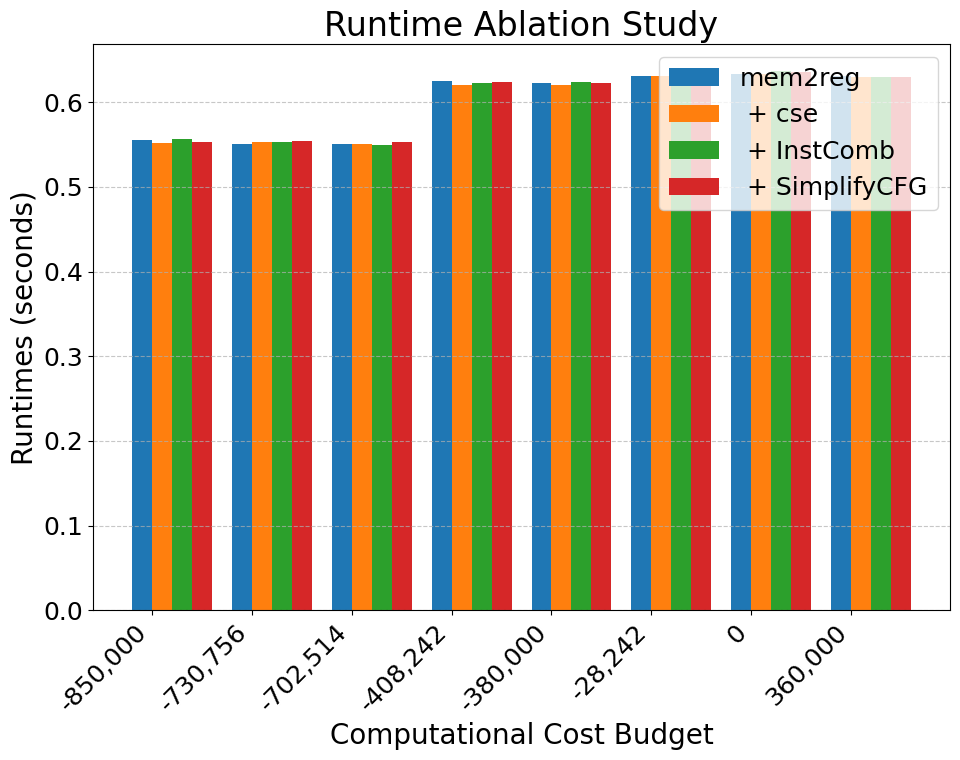

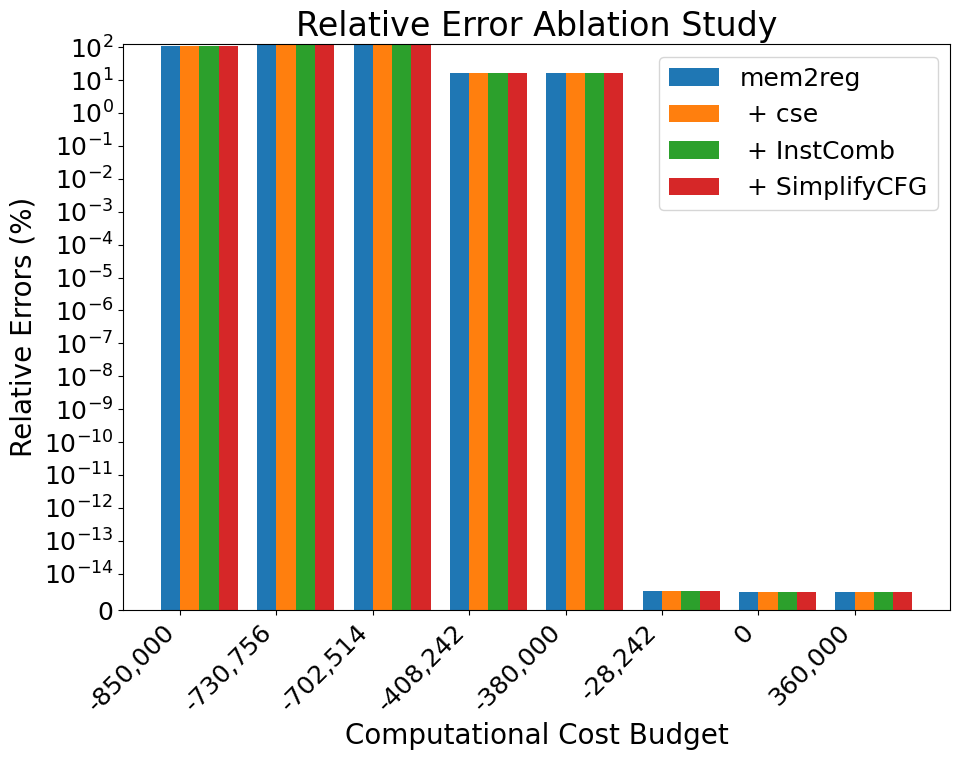

In [14]:
legend_labels =[ "mem2reg", " + cse", " + InstComb", " + SimplifyCFG"]
pkl_data = load_ablation_data(tmp_dir,prefix)
pkl_data[0][1]["budgets"], tmp_dir, prefix
plot_runtime_ablation(pkl_data, legend_labels)
plot_error_ablation(pkl_data, legend_labels)